In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import json

In [2]:
# importing ato data
ato_data = pd.read_excel("atoabsgovhack2017.xlsx",sheet_name=1)
t2015 = ato_data[ato_data['Income year']== 2015]

# cleaning datasets
nswBetweena = t2015[(t2015['Postcode'] > 1999)]
nswDf = nswBetweena[(nswBetweena['Postcode']<3000)]
nswDf['Popultion'] = nswDf['Male']+nswDf['Female']
nswDf['No income'] = nswDf['Popultion'] - nswDf['Individuals1']
nswDf['Average income'] = nswDf['Total income or loss']/nswDf['Individuals1']


In [3]:
# importing school disability data

school_data = pd.read_csv("masterdatasetnightlybatchsupport.csv")
sdf = school_data
capitalised = sdf['town_suburb'].str.capitalize()
sdf['town_suburb'] = capitalised

In [5]:
# importing contribution data

contribution_data = pd.read_csv("2015-nsw-public-school-voluntary-school-contributions.csv")
cdf = contribution_data
cdf['school_name'] = cdf['school_name'].str.strip()
cdf['voluntary_contributions_2015'] = cdf['voluntary_contributions_2015'].str.strip()
cdf['voluntary_contributions_2015'] = cdf['voluntary_contributions_2015'].str.replace(',', '')
cdf['voluntary_contributions_2015'] = cdf['voluntary_contributions_2015'].str.replace('$', '')
cdf['voluntary_contributions_2015'] = cdf['voluntary_contributions_2015'].astype(int)
cdf['subject_contributions_2015'] = cdf['subject_contributions_2015'].str.strip()
cdf['subject_contributions_2015'] = cdf['subject_contributions_2015'].str.replace(',', '')
cdf['subject_contributions_2015'] = cdf['subject_contributions_2015'].str.replace('$', '')
cdf['subject_contributions_2015'] = cdf['subject_contributions_2015'].astype(int)

# importing geo data
postcode_data = pd.read_csv("Australian_Post_Codes_Lat_Lon.csv")
pdf = postcode_data
capitalisedSub = pdf['suburb'].str.capitalize()
pdf['suburb'] = capitalisedSub

# attributing all data
count_sdf = sdf.groupby('school_name').count().reset_index().rename(columns={'State': 'Count'}).sort_values(by='school_code',ascending=False).reset_index()

# four or more contributions
fourormore = count_sdf[count_sdf['school_code'].isin(['6','5','4'])]

fourormore_cont = cdf[cdf['school_name'].isin(list(fourormore['school_name']))]
four_voluntary_sorted = fourormore_cont.sort_values('voluntary_contributions_2015')
four_subject_sorted = fourormore_cont.sort_values('subject_contributions_2015')

# list of schools with 5 or more disability classes
fiveormore_df = fiveormore 
drop_cols = [0,2,3,4,5,6,7]
fiveormore_df['number_classes'] = fiveormore_df['class_type'] 
fiveormore_df.drop(fiveormore_df.columns[drop_cols], axis=1)

# fiveormore contributions
fiveormore = count_sdf[count_sdf['school_code'].isin(['6','5'])]
fiveormore_cont = cdf[cdf['school_name'].isin(list(fiveormore['school_name']))]
five_voluntary_sorted = fiveormore_cont.sort_values('voluntary_contributions_2015')
five_subject_sorted = fiveormore_cont.sort_values('subject_contributions_2015')

# finding school postcode from name
five_names_list = list(five_voluntary_sorted['school_name'])
five_sc_list = sdf[sdf['school_name'].isin(five_names_list)].drop_duplicates(subset='postcode', keep='first', inplace=False)

five_sc_averageinc = nswDf[nswDf['Postcode'].isin(list(five_sc_list['postcode']))]

# rounding off income
five_sc_averageinc['Average income'] = five_sc_averageinc['Average income'].round(decimals=2)

# list of schools with 5 or more disability classes sorted by postcode
sc_ident_df = sdf[sdf['school_name'].isin(list(fiveormore_df['school_name']))].drop_duplicates(subset='postcode', keep='first', inplace=False)
sc_ident_df.sort_values(by='postcode')

,school_code,school_name,postcode,town_suburb,operational_directorate,principal_network,class_type
820,5675,Sir Eric Woodward Memorial School,2075,St ives,Macquarie Park,Pittwater,Supporting students with autism (Au)
1300,8456,Fairvale High School,2165,Fairfield west,Ultimo,Fairfield,Supporting students with behavioural issues (BD)
521,4396,Busby West Public School,2168,Green valley,Ultimo,Liverpool,Supporting students with autism (Au)
1323,8467,Henry Kendall High School,2250,Gosford,Macquarie Park,Mooney Mooney,Supporting students with autism (Au)
897,7445,Woy Woy Public School,2256,Woy woy,Macquarie Park,Brisbane Water,Supporting students with autism (Au)
1499,8566,Melville High School,2440,Kempsey,Tamworth,Macleay Valley,Supporting students with mental health issues ...
987,8154,Casino High School,2470,Casino,Tamworth,Clarence Valley,Supporting students with mental health issues ...
1354,8480,Warrawong High School,2502,Warrawong,Wagga Wagga,Lake Illawarra North,Supporting students with autism (Au)
1543,8593,Vincentia High School,2540,Vincentia,Wagga Wagga,South Coast,Supporting students with autism (Au)
37,1287,Bomaderry Public School,2541,Bomaderry,Wagga Wagga,Shoalhaven,Supporting students with autism (Au)


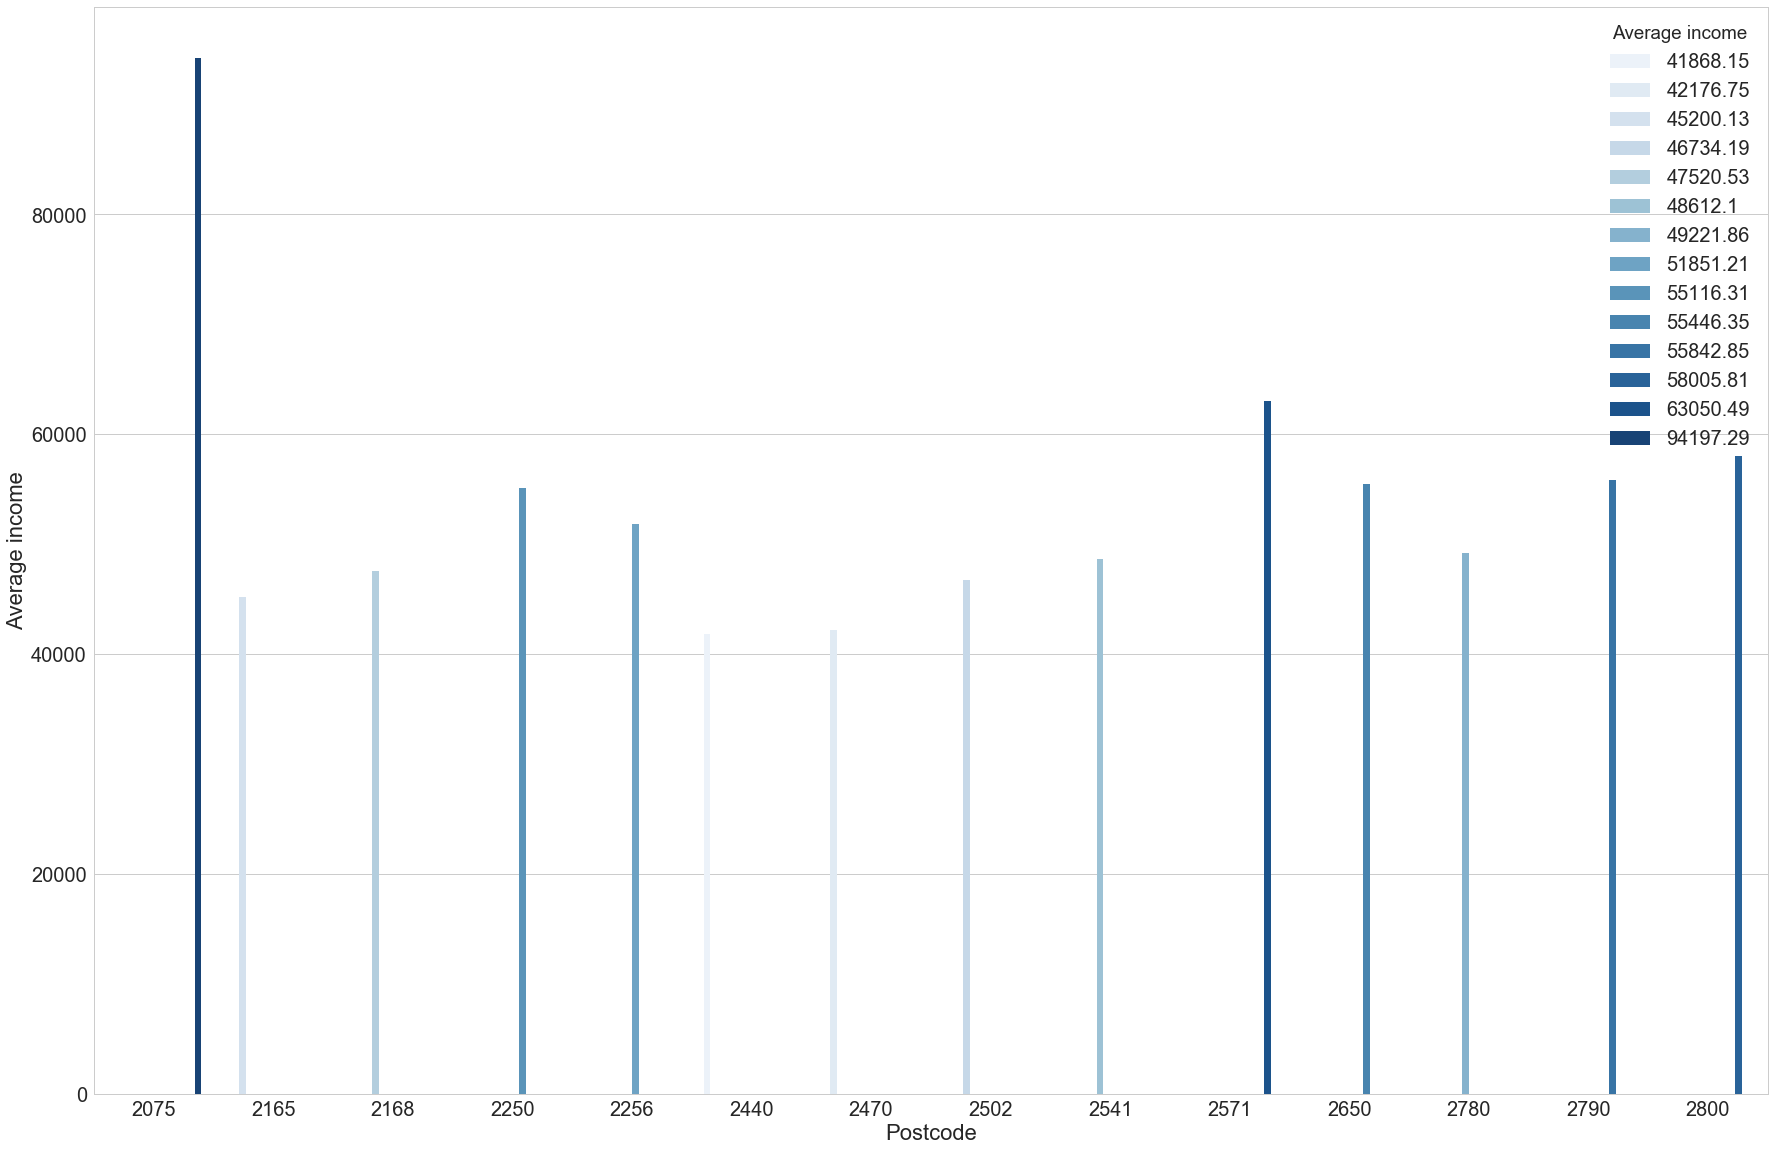

In [6]:
# graphing income

sns.set(style="whitegrid", color_codes=True, font_scale=2)

fig, ax = plt.subplots(figsize=(30,20))

ax = sns.barplot(x="Postcode", y="Average income", data=five_sc_averageinc, hue='Average income', ci=None, palette=("Blues"))

In [7]:
# total_average for income

total_income = nswDf['Total income or loss'].sum()
total_people = nswDf['Individuals1'].sum()
total_average_income = total_income/total_people
total_average_income

63279.84710626969

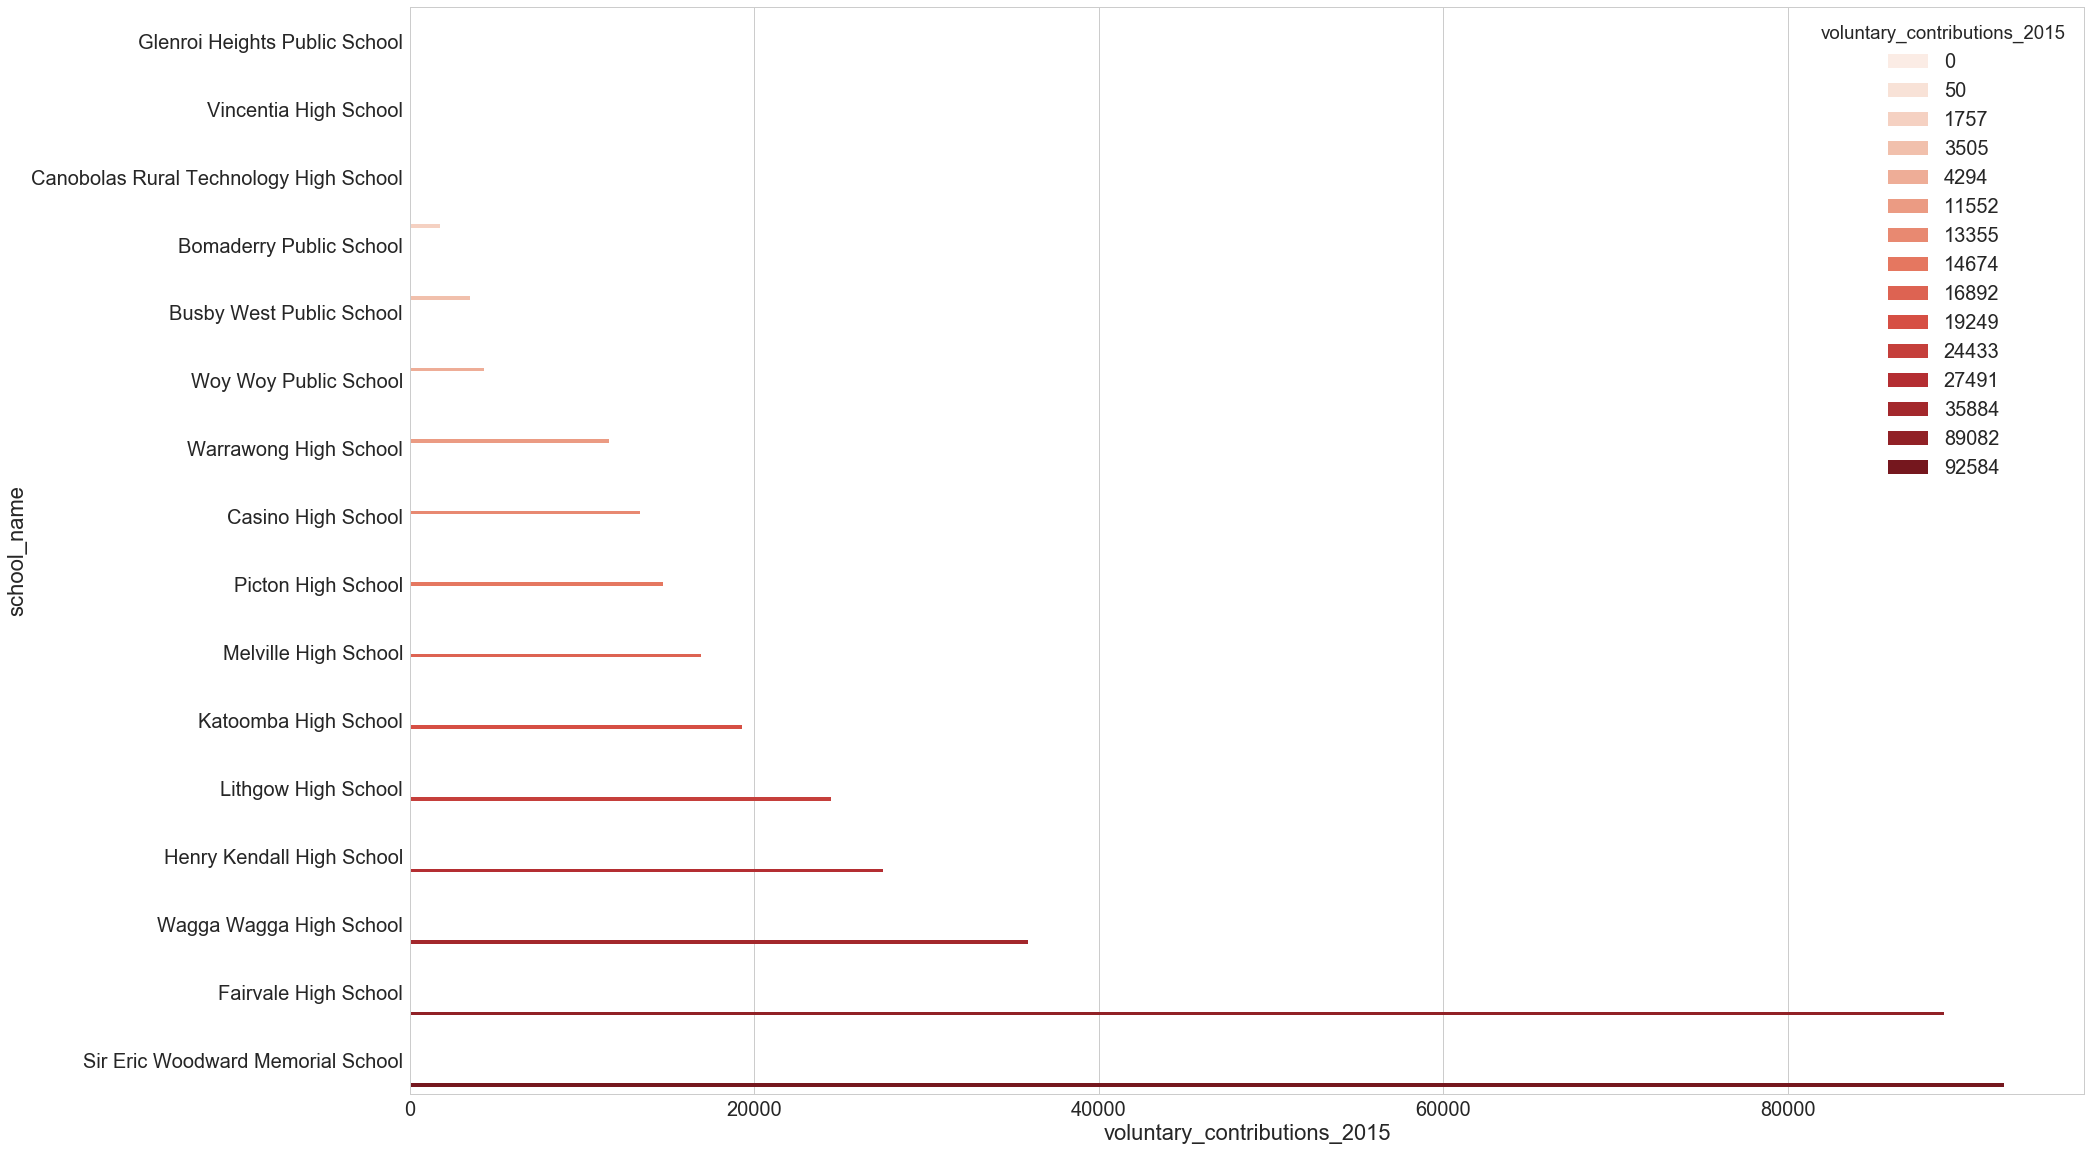

In [8]:
# graph for voluntary contributions

fig, ax = plt.subplots(figsize=(30,20))

sns.barplot(x="voluntary_contributions_2015", y="school_name", data=five_voluntary_sorted, hue='voluntary_contributions_2015', ci=None, palette=("Reds"))

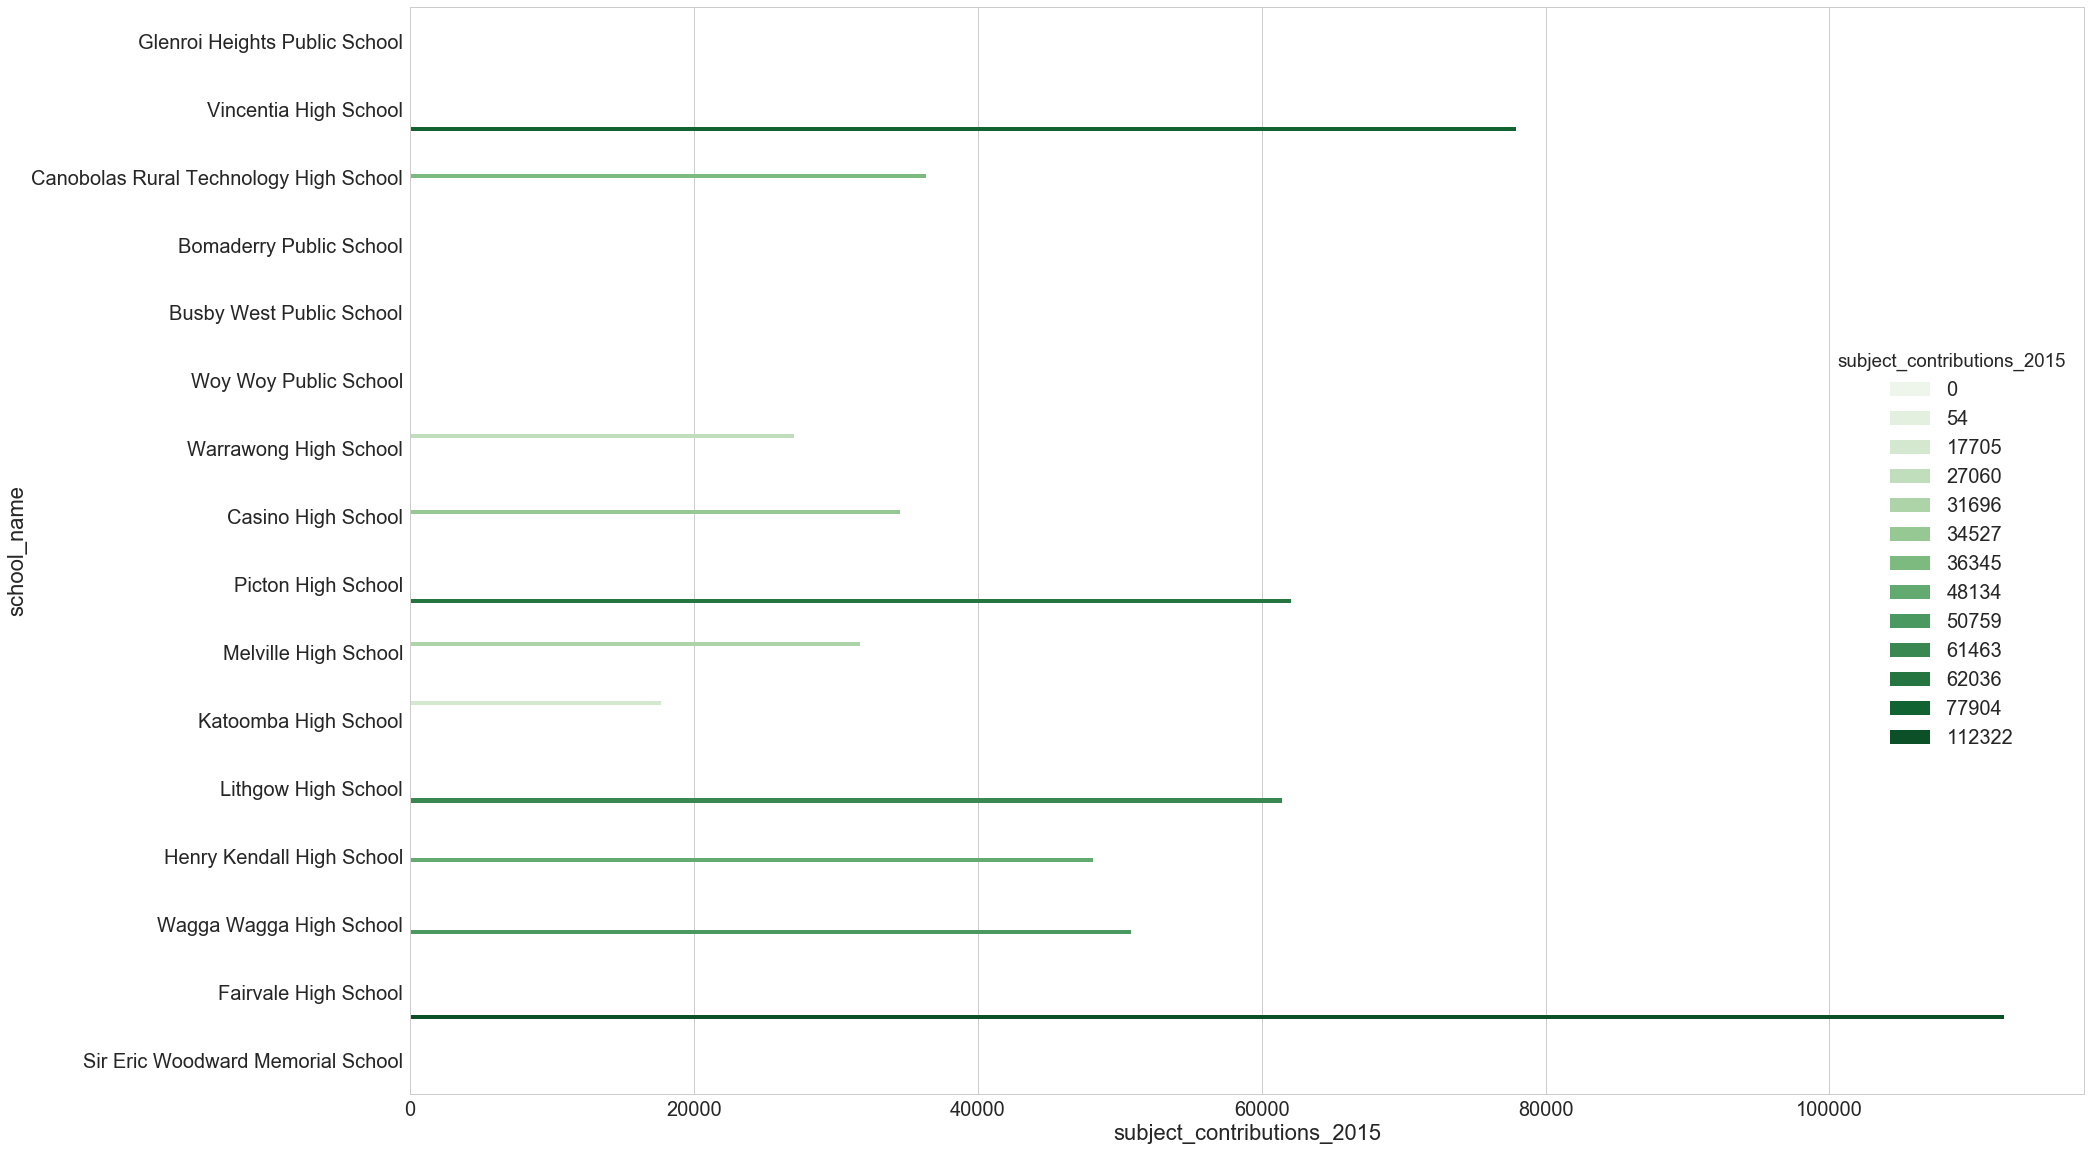

In [9]:
# graph for voluntary contributions

fig, ax = plt.subplots(figsize=(30,20))

sns.barplot(x="subject_contributions_2015", y="school_name", data=five_voluntary_sorted, hue='subject_contributions_2015', ci=None, palette=("Greens"))

In [10]:
# cleaning data for geojson output
sc_ident_df['town_suburb'] = sc_ident_df['town_suburb'].str.strip()

locating_schools = pdf[pdf['suburb'].isin(list(sc_ident_df['town_suburb']))]
loc_suburbs_nsw = locating_schools[locating_schools['state']=='NSW']

sc_lat = list(loc_suburbs_nsw['lat'])
sc_lon = list(loc_suburbs_nsw['lon'])
sc_name = list(loc_suburbs_nsw['suburb'])

In [12]:
# writing geojson output file
school_geo = []


for i in range(len(sc_lat)):
    fullfeatures = {}
    fullfeatures ['type'] = 'Feature'  
    
    testgeoDict = {}
    testgeoDict ['type'] = 'Point'
    testgeoDict ['coordinates'] = [sc_lon[i],sc_lat[i]]
    
    fullfeatures ['geometry'] = testgeoDict
    
    testname = {}
    testname ['name'] = sc_name[i]
    
    fullfeatures ['properties'] = testname
    
    school_geo.append(fullfeatures)


ptjson = {}
ptjson['type'] = 'FeatureCollection'
ptjson['features'] = school_geo


ptfile = open('school_suburbs.geojson','w')
ptfile.write (json.dumps(ptjson, sort_keys=False, indent=4, separators=(',',':')))
ptfile.close()
